## Load packages

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Load dataset

In [22]:
WFH_BurnOut = pd.read_csv("WFH_BurnOut.csv")

In [23]:
WFH_BurnOut.head()

,Employee_ID,Gender,WFH_Setup_Available,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,Female,No,3.8,0.16
1,fffe3700360033003500,Male,Yes,5.0,0.36
2,fffe31003300320037003900,Female,Yes,5.8,0.49
3,fffe32003400380032003900,Male,Yes,2.6,0.20
4,fffe31003900340031003600,Female,No,6.9,0.52


## Remove NULL values

In [24]:
WFH_BurnOut1 = WFH_BurnOut.dropna(axis= 0)

In [25]:
WFH_BurnOut1.isnull().sum()

Employee_ID             0
Gender                  0
WFH_Setup_Available     0
Mental_Fatigue_Score    0
Burn_Rate               0
dtype: int64

In [26]:
WFH_BurnOut1.head()

,Employee_ID,Gender,WFH_Setup_Available,Mental_Fatigue_Score,Burn_Rate
0,fffe32003000360033003200,Female,No,3.8,0.16
1,fffe3700360033003500,Male,Yes,5.0,0.36
2,fffe31003300320037003900,Female,Yes,5.8,0.49
3,fffe32003400380032003900,Male,Yes,2.6,0.20
4,fffe31003900340031003600,Female,No,6.9,0.52


## Recoding string values to integer values

In [27]:
def Gender (series):
    if series == "Female":
        return 0
    if series == "Male":
        return 1
WFH_BurnOut1["GenderR"] = WFH_BurnOut["Gender"].apply(Gender)

<ipython-input-27-0c1e83cfdf1a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WFH_BurnOut1["GenderR"] = WFH_BurnOut["Gender"].apply(Gender)


In [28]:
def WFH_Setup_Available (series):
    if series == "No":
        return 0
    if series == "Yes":
        return 1
WFH_BurnOut1["WFH_Setup_AvailableR"] = WFH_BurnOut["WFH_Setup_Available"].apply(WFH_Setup_Available)

<ipython-input-28-7bba98931f32>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WFH_BurnOut1["WFH_Setup_AvailableR"] = WFH_BurnOut["WFH_Setup_Available"].apply(WFH_Setup_Available)


In [29]:
WFH_BurnOut1.head()

,Employee_ID,Gender,WFH_Setup_Available,Mental_Fatigue_Score,Burn_Rate,GenderR,WFH_Setup_AvailableR
0,fffe32003000360033003200,Female,No,3.8,0.16,0,0
1,fffe3700360033003500,Male,Yes,5.0,0.36,1,1
2,fffe31003300320037003900,Female,Yes,5.8,0.49,0,1
3,fffe32003400380032003900,Male,Yes,2.6,0.20,1,1
4,fffe31003900340031003600,Female,No,6.9,0.52,0,0


## check for null values

In [30]:
WFH_BurnOut1.isnull().sum()

Employee_ID             0
Gender                  0
WFH_Setup_Available     0
Mental_Fatigue_Score    0
Burn_Rate               0
GenderR                 0
WFH_Setup_AvailableR    0
dtype: int64

# Data Exploration

## What is the correlation between Mental fatigue and wfh setup available?

## trying scatterplot to see how to represent data

Text(0, 0.5, 'Mental Fatigue')

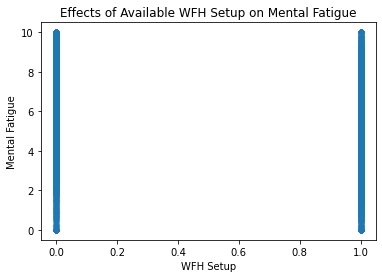

In [31]:
Plot = WFH_BurnOut1.plot.scatter(x="WFH_Setup_AvailableR", y= "Mental_Fatigue_Score")
Plot.set_title("Effects of Available WFH Setup on Mental Fatigue")
Plot.set_xlabel("WFH Setup")
Plot.set_ylabel("Mental Fatigue")

### not good representation of data

## Scatterplot of Burn_rate and Mental fatigue

Text(0, 0.5, 'Burnout Rate')

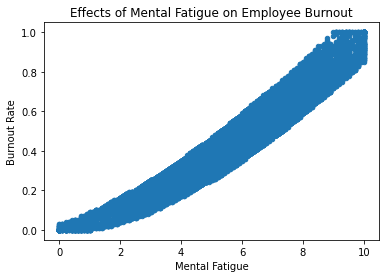

In [32]:
Plot = WFH_BurnOut1.plot.scatter(x="Mental_Fatigue_Score", y= "Burn_Rate")
Plot.set_title("Effects of Mental Fatigue on Employee Burnout")
Plot.set_xlabel("Mental Fatigue")
Plot.set_ylabel("Burnout Rate")

#### Scatterplot shows a corrolation between burn rate and mental fatigue, as expected the higher the fatigue
#### the higher the burn rate

# Machine Learning

## Predict BurnOut Rate--Does WFH setup effect burnout in employees

## Setup X and Y for testing and training

In [33]:
x = WFH_BurnOut1[["WFH_Setup_AvailableR", "Mental_Fatigue_Score","GenderR"]] 
y = WFH_BurnOut1["Burn_Rate"]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state=101)

In [35]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(13776, 3) (13776,)
(5905, 3) (5905,)


### The results show that there are 13,776 rows and 3 columns in the 
### x_train dataset and 5905 rows and 3 columns in the x_test dataset

## Create Linear Regression

In [36]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

### above split indicates that linear regression worked

In [37]:
predictions = lm.predict(x_test)
predictions

array([0.67416511, 0.51109211, 0.31208084, ..., 0.50230545, 0.63579499,
       0.46475545])

### above is the resulting array which does not depict visually the prediction results. Will do a scatterplot
### to better visualize the prediction

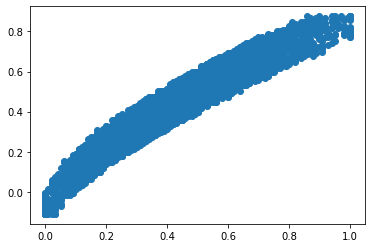

In [38]:
plt.scatter(y_test, predictions)

### the prediction looks pretty strong.  Let's look at a more accurate view of prediction using score()

In [39]:
print("Score:", lm.score(x_test, y_test))

Score: 0.8928532493489794


### The result is the model is approximately accurate 89.3% of the time, this is very good!

### Let's look at MAE or (Mean Absolute Error) for the model--average error of predictions to real data

In [40]:
metrics.mean_absolute_error(y_test, predictions)

0.05382176782221755

### the lowest you can have is 0 and this was 0.05, which is very good!

## It is always good to do a cross-validation to ensure bais has not been introduced into the model

## K-folds cross-validation

In [41]:
kfold = KFold(3, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    1     2     3 ... 19678 19679 19680], test: [    0     4     5 ... 19673 19675 19676]
train: [    0     3     4 ... 19675 19676 19679], test: [    1     2    10 ... 19677 19678 19680]
train: [    0     1     2 ... 19677 19678 19680], test: [    3     9    11 ... 19670 19674 19679]


/Users/vanessapullum/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


### These are all of the sets, now we will print cross-validation score

In [43]:
print(cross_val_score(lm, x,y, cv=3))

[0.8949527  0.89480781 0.89414731]


### The results show that all three models are showing 89% this model is very strong at prediction!